## Shortest path planning

example from motion planning course offered by Univ of Toronto

A map of Berkley, California is given
* Implement Dijkstra's search algorithm on a road network graph.
* Implement the A* search algorithm using a Euclidean heuristic on a road network graph. 

[OSMNX library](https://osmnx.readthedocs.io/en/stable/) is used to generate Python graphs from Open Street Map (OSM) data.  

In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import KDTree 
import matplotlib.pyplot as plt

In [ ]:
#from https://github.com/sidmitra/osmnx_playground

dist = 4*805 # radius in meters(approx 2 miles)
places = [
    ['delhi', (28.632821, 77.219459)], 
    ['mumbai', (18.932018, 72.834971)], 
    ['kolkatta', (22.566929, 88.347260)], 
    ['chennai', (13.080271, 80.284657)], 
    ['bengaluru', (12.977830, 77.593817)], 
    ['hyderabad', (17.366103, 78.469492)], 
    ['ahmedabad', (23.026948, 72.574903)], 
    ['jaipur', (26.907290, 75.805467)], 
    ['chandigarh', (30.732453, 76.772294)],
    ['pune', (18.519708, 73.856646)],
    ['lucknow', (26.845984, 80.946011)],
    ['gandhinagar', (23.224847, 72.646416)],   
]

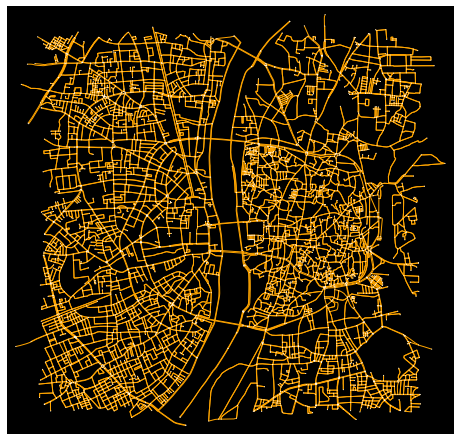

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
name, point = places[6]
nt = 'drive_service'
G = ox.graph_from_point(point, dist=dist,dist_type="bbox", network_type=nt, truncate_by_edge=True)
ox.plot_graph(G, node_size=1, edge_color='orange', bgcolor='#000000', show=True)

Print the edges and nodes of this graph

In [ ]:
print(len(G.nodes()), len(G.edges()))

5308 13020


Arbitrarily select the first node and last node in the Graph and find the shortest path

In [ ]:
list(G.nodes())[2500]

3339277882

In [ ]:
origin = list(G.nodes())[0]
destination = list(G.nodes())[4500]
shortest_path = nx.shortest_path(G, origin, destination)

Now visualize using plot_graph_route

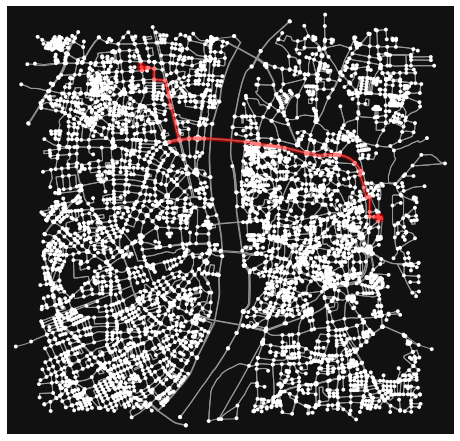

In [ ]:
fig, ax = ox.plot_graph_route(G, shortest_path)

In [ ]:
# Problem adapted from Introduction to AI, U of Toronto
 https://github.com/booklover98/A-star-Pathfinding

oshawa = (43.945403, -78.892466)
G = ox.graph_from_point(oshawa, dist=2000)
start = ox.geocode('2000 Simcoe St N, Oshawa, Ontario')
end = ox.geocode('18 Niagara Dr, Oshawa, Ontario')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
278589216,43.928847,-78.874744,3,NaN,POINT (-78.87474 43.92885)
278589217,43.928758,-78.874863,3,NaN,POINT (-78.87486 43.92876)
278589220,43.928360,-78.877049,3,NaN,POINT (-78.87705 43.92836)
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017)
278589617,43.949039,-78.885790,3,NaN,POINT (-78.88579 43.94904)


In [ ]:
tree = KDTree(nodes[['y', 'x']], metric='euclidean')

start_idx = tree.query([start], k=1, return_distance=False)[0]
end_idx = tree.query([end], k=1, return_distance=False)[0]

closest_start_node = nodes.iloc[start_idx].index.values[0]
closest_end_node = nodes.iloc[end_idx].index.values[0]

#retrieve origin and destination node id
origin = closest_start_node
destination = closest_end_node

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)


Visualize the shortest path and graph

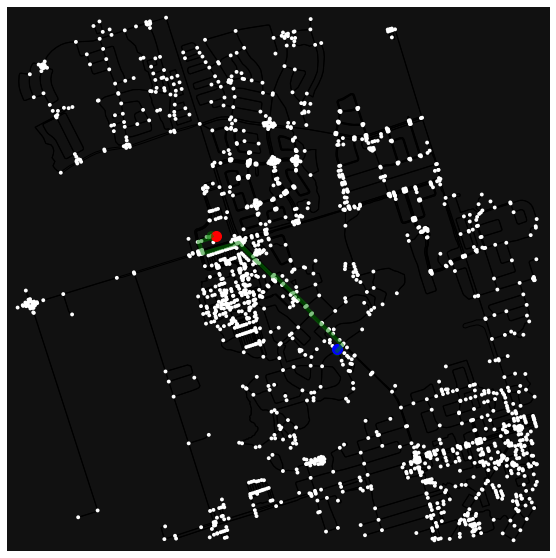

In [ ]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(G.nodes[destination]['y'], G.nodes[destination]['x'], c='green', s=100)
ax.scatter(G.nodes[origin]['y'], G.nodes[origin]['x'], c='green', s=100)


Use these ideas to find shortest path between 2 addresses/ geocodes in an Indian city of your choice 

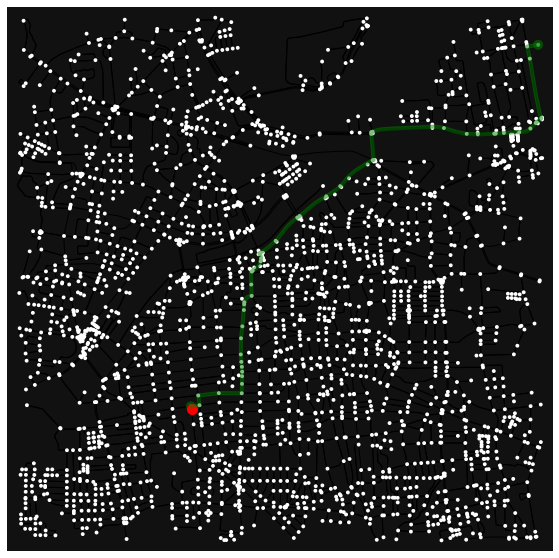

In [ ]:
# Pune is the city in Maharashtra and has two famous places named Sadashiv Peth & Nanded city. 


pune = (18.519708, 73.856646)


# Problem adapted from Introduction to AI, U of Toronto
# https://github.com/booklover98/A-star-Pathfinding

#oshawa = (43.945403, -78.892466)
G = ox.graph_from_point(pune, dist=2000)
start = ox.geocode('Sadashiv Peth')
end = ox.geocode('Nanded City')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()



tree = KDTree(nodes[['y', 'x']], metric='euclidean')

start_idx = tree.query([start], k=1, return_distance=False)[0]
end_idx = tree.query([end], k=1, return_distance=False)[0]

closest_start_node = nodes.iloc[start_idx].index.values[0]
closest_end_node = nodes.iloc[end_idx].index.values[0]

#retrieve origin and destination node id
origin = closest_start_node
destination = closest_end_node

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)




#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(G.nodes[destination]['y'], G.nodes[destination]['x'], c='green', s=100)
ax.scatter(G.nodes[origin]['y'], G.nodes[origin]['x'], c='green', s=100)

